<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Аналитика" data-toc-modified-id="Аналитика-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Аналитика</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Спрос на рейсы авиакомпании

Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

У вас есть файлы с результатами запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.


## Аналитика

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_csv('/datasets/query_1.csv')

In [3]:
data1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [5]:
data1.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000



<div class="alert alert-info">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
На мой взгляд, стоит давать более говорящие названия для переменных</div>

# Вывод
<div class="alert alert-block alert-info">
Данные загружены и проверены, в типах данных, на мой взгляд, ошибок нет. Числа представлены в числовом формате.
</div>

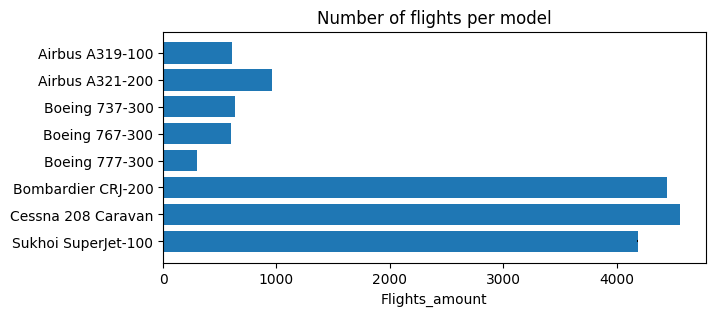

In [18]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(7, 3))
people = data1['model']
y_pos = np.arange(len(data1['model']))
error = np.random.rand(len(data1['model']))
ax.barh(y_pos, data1['flights_amount'], xerr=error,align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(data1['model'])
ax.invert_yaxis() 
ax.set_xlabel('Flights_amount')
ax.set_title('Number of flights per model')

plt.show()

# Вывод по графику
<div class="alert alert-block alert-info">
Есть три модели самолетов, количество рейсов на которых значительно выше.
</div>


<div class="alert alert-info">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Как ты думаешь, с чем это может быть связано?</div>


<div class="alert alert-info">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Еще интересно проверить, будет ли такой же результат, если мы будем учитывать вместимость самолетов</div>

In [7]:
data2 = pd.read_csv('/datasets/query_3.csv')

In [8]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [9]:
data2.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


In [10]:
data2 = data2.sort_values(by=['average_flights'],ascending=False)

# Вывод
<div class="alert alert-block alert-info">
Данные загружены и проверены, в типах данных, на мой взгляд, ошибок нет. Числа представлены в числовом формате. Видим, что максимальное значение и значение среднего слишком сильно различаются, нужно проверить, не выброс ли.
</div>

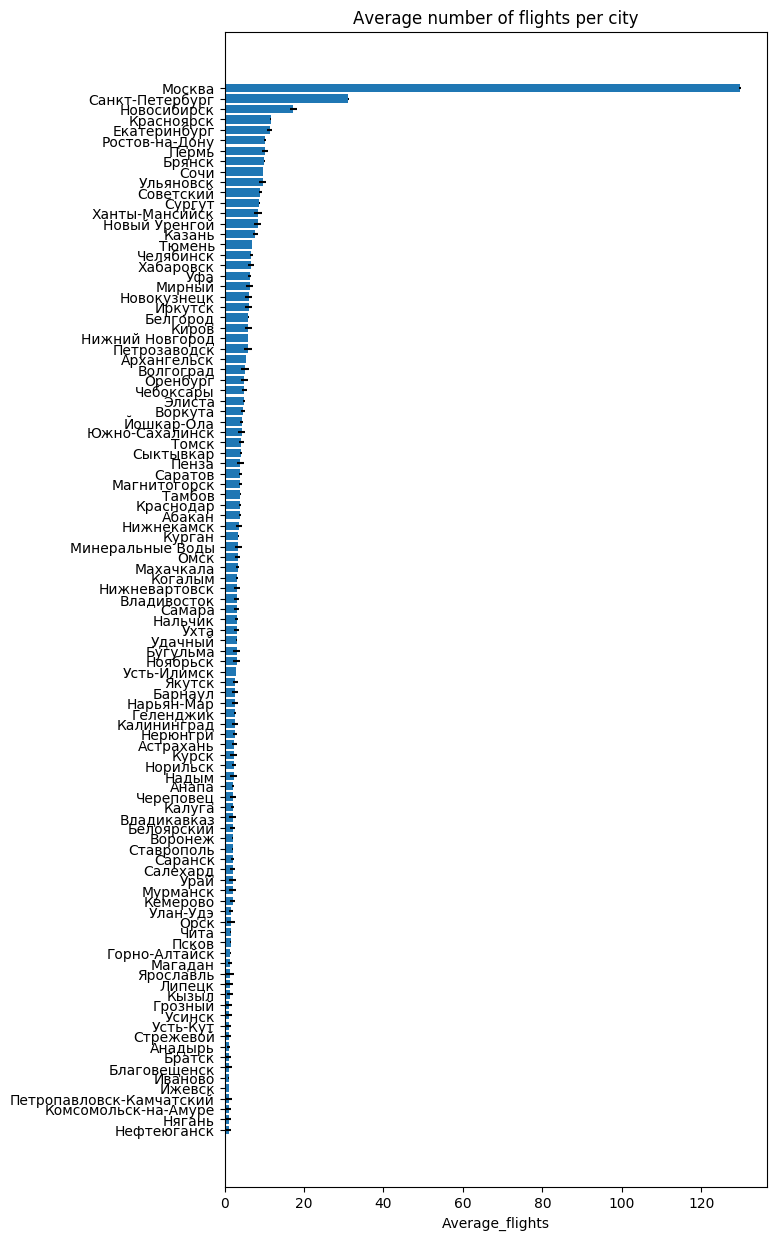

In [19]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(7, 15))
y_pos = np.arange(len(data2['city']))
error = np.random.rand(len(data2['city']))
ax.barh(y_pos, data2['average_flights'], xerr=error,align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(data2['city'])
ax.invert_yaxis()  
ax.set_xlabel('Average_flights')
ax.set_title('Average number of flights per city')

plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feab0056810>]],
      dtype=object)

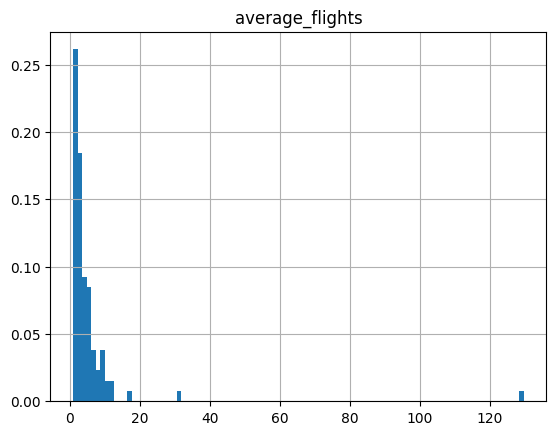

In [12]:
data2.hist(density=True, bins=100) 

# Вывод по графику
<div class="alert alert-block alert-info">
Посторив график, становится понятно, что выбросов нет
</div>


<div class="alert alert-success">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Да, все выглядит логично</div>

In [13]:
data3 = data2.sort_values(by=['average_flights'],ascending=False).head(10)

In [14]:
data3

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


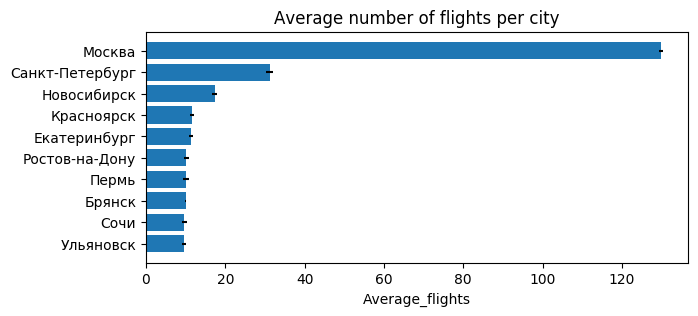

In [20]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(7, 3))
y_pos = np.arange(len(data3['city']))
error = np.random.rand(len(data3['city']))
ax.barh(y_pos, data3['average_flights'], xerr=error,align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(data3['city'])
ax.invert_yaxis() 
ax.set_xlabel('Average_flights')
ax.set_title('Average number of flights per city')

plt.show()


<div class="alert alert-info">
<h1>Комментарий ревьюера <a class="tocSkip"></a></h1>
Тут, как мне кажется, есть явная зависиомость между количеством рейсов и размером города</div>

# Общий вывод
<div class="alert alert-block alert-info">
Была проделана работа по изучению 2 датасетов и их анализа. Данные были изучены, были построены графики. Логично, что наибольшее количество рейсов осуществляется в столицу и в Санкт-Петербург. Остальные города распределяются уже без сильных различий.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"></a></h2>

-Спасибо за качественно сделанный проект, было приятно проверять.

- Код написан хорошо 

- Соблюдена структура проекта 


- Оставил пару советов и комментариев

    
Удачи в следующих проектах!

</div>

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]   Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Файлы изучены
- [x]  Типы данных проверены на корректность
- [x]  Выбран топ-10 городов по количеству рейсов
- [x]  Построен график «Модели самолётов и количество рейсов»
- [x]  Построен график «Города и количество рейсов»
- [x]  Построен график «Топ-10 городов и количество рейсов»
- [x]  На каждом этапе написаны выводы
- [x]  Написан общий вывод